# Random forest

## Create and train the model

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load the dataset for training (with labels)
df = pd.read_csv('../pre_processing_and_viz/df_train.csv')
df

,ID,Age,Gender,MMSE,Site,label,label_id,site_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40,gender_id
0,hokuto_dementia1,60,M,13,A,dementia,2,0,1.527738e+03,1.400718e+03,1.223784e+03,3.281070e+03,1.531131e+03,1
1,hokuto_dementia2,64,M,17,B,dementia,2,1,0.000000e+00,1.470078e+06,0.000000e+00,2.326050e+06,1.262857e+06,1
2,hokuto_dementia3,69,F,9,A,dementia,2,0,1.278396e+03,1.214818e+03,1.133075e+03,3.814643e+03,1.928315e+03,0
3,hokuto_dementia4,70,M,22,B,dementia,2,1,0.000000e+00,3.975737e+05,0.000000e+00,6.295413e+05,3.441654e+05,1
4,hokuto_dementia5,73,M,18,A,dementia,2,0,9.715404e+03,8.743269e+03,7.358837e+03,1.555337e+04,3.254478e+03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,hokuto_control96,80,M,27,B,control,0,1,0.000000e+00,3.654249e+04,0.000000e+00,5.970315e+04,3.707580e+04,1
140,hokuto_control97,81,M,28,B,control,0,1,0.000000e+00,5.084338e+05,0.000000e+00,8.046457e+05,4.396953e+05,1
141,hokuto_control98,81,M,27,A,control,0,0,1.813328e+06,1.743510e+06,1.624769e+06,4.545834e+06,1.305148e+06,1
142,hokuto_control99,85,M,28,B,control,0,1,0.000000e+00,1.776107e+05,0.000000e+00,2.819723e+05,1.563449e+05,1


In [77]:

# drop mmse because this feature is not given in the df_test. Drop Site because its only implies a sample freq different which is already taken into account for the features extraction


features = df.drop(['ID', 'label', 'label_id', 'Site', 'Gender', 'MMSE'], axis=1)

features.head()

features.dtypes


Age              int64
site_id          int64
Delta-1:4      float64
Theta-4:8      float64
Alpha-8:13     float64
Beta-13:30     float64
Gamma-30:40    float64
gender_id        int64
dtype: object

(144, 4)

Model accuracy: 0.8181818181818182


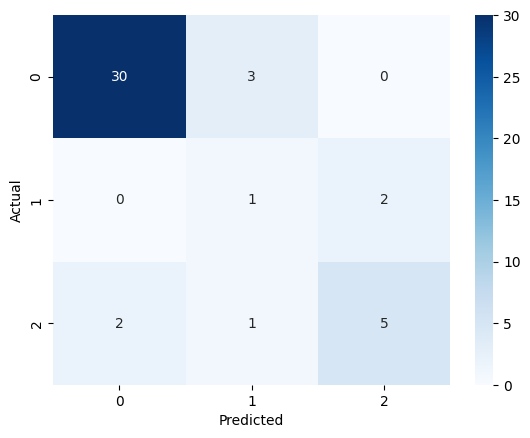

In [85]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Préparation des caractéristiques et des étiquettes
features = df.drop(
    ['ID', 'label', 'label_id', 'Site', 'Gender', 'MMSE'], axis=1)
labels = df['label_id']

# Normalisation des caractéristiques
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de PCA pour réduire la dimensionnalité
# Choisissez le nombre de composantes à conserver, par exemple pour conserver 95% de la variance expliquée
pca = PCA(n_components=0.9)
features_reduced = pca.fit_transform(features_scaled)
display(features_reduced.shape)

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    features_reduced, labels, test_size=0.3)

# Initialisation du classificateur Random Forest
rf = RandomForestClassifier(n_estimators=50)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Calcul de l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Use the trained model to predict the test data 

In [79]:
df_test = pd.read_csv('../pre_processing_and_viz/df_test.csv')
df_test.head()



,ID,Age,Gender,Site,gender_id,site_id,label,label_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40
0,hokuto_test1,64,M,A,1,0,NaN,NaN,2.564830e+07,2.522521e+07,2.451852e+07,8.550627e+07,4.428985e+07
1,hokuto_test2,70,F,A,0,1,NaN,NaN,2.838066e+03,2.804487e+03,2.718521e+03,8.439152e+03,2.834072e+03
2,hokuto_test3,61,F,B,0,0,NaN,NaN,0.000000e+00,1.525385e+04,0.000000e+00,2.620135e+04,1.867067e+04
3,hokuto_test4,83,F,B,0,1,NaN,NaN,0.000000e+00,2.093090e+04,0.000000e+00,3.685960e+04,2.663569e+04
4,hokuto_test5,71,M,A,1,0,NaN,NaN,3.368586e+02,3.468851e+02,3.629394e+02,1.620425e+03,1.151548e+03


In [86]:
X_test = df_test.drop(
    ['ID', 'label', 'label_id', 'Site', 'Gender', 'label', 'label_id'], axis=1)
display(X_test.head())

pca = PCA(n_components=0.9)
X_test_reduced = pca.fit_transform(X_test)

X_test_reduced


,Age,gender_id,site_id,Delta-1:4,Theta-4:8,Alpha-8:13,Beta-13:30,Gamma-30:40
0,64,1,0,2.564830e+07,2.522521e+07,2.451852e+07,8.550627e+07,4.428985e+07
1,70,0,1,2.838066e+03,2.804487e+03,2.718521e+03,8.439152e+03,2.834072e+03
2,61,0,0,0.000000e+00,1.525385e+04,0.000000e+00,2.620135e+04,1.867067e+04
3,83,0,1,0.000000e+00,2.093090e+04,0.000000e+00,3.685960e+04,2.663569e+04
4,71,1,0,3.368586e+02,3.468851e+02,3.629394e+02,1.620425e+03,1.151548e+03


array([[ 1.02725144e+08],
       [-2.94463343e+06],
       [-2.92196762e+06],
       [-2.90864881e+06],
       [-2.95259542e+06],
       [-2.80287555e+06],
       [-2.94359692e+06],
       [-2.55170138e+06],
       [-2.93847703e+06],
       [-2.94426741e+06],
       [-2.07980578e+06],
       [-2.95004003e+06],
       [-2.94560489e+06],
       [-2.94893880e+06],
       [-2.93966524e+06],
       [-2.89966263e+06],
       [-2.88235441e+06],
       [-2.94243382e+06],
       [-2.94388387e+06],
       [-2.94707431e+06],
       [-1.37265398e+06],
       [-3.47789528e+05],
       [-2.92182102e+06],
       [-2.94387360e+06],
       [-7.23324102e+05],
       [-2.91519598e+06],
       [-2.91167071e+06],
       [-2.83778713e+06],
       [-7.24512677e+05],
       [-2.93985191e+06],
       [-2.89042245e+06],
       [-2.88796587e+06],
       [-2.64009574e+06],
       [ 3.33322444e+06],
       [-2.95097388e+06],
       [-2.94278644e+06],
       [-2.94165177e+06],
       [-2.92966881e+06],
       [-2.4

In [82]:
# Faire des prédictions
predicted_labels = rf.predict(X_test_reduced)
display(predicted_labels)

ValueError: X has 1 features, but RandomForestClassifier is expecting 4 features as input.